 # <font color=purple>Credit card fraud detection</font>

# <font color=green>Import Libraries</font>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

In [2]:
credit_card_data=pd.read_csv("fraudTest.csv.zip")
credit_card_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [3]:
credit_card_data.shape

(555719, 23)

In [4]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [5]:
credit_card_data.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

# <font color=green>Distribution of legit transaction  and  fraudulent transaction</font> 
credit_card_data['is_fraud'].value_counts() # 0 = Normal transaction,1= fraudulent transactions

THIS DATASET IS HIGHLY UNBALANCED

In [6]:
# separating the data for analysis
legit= credit_card_data[credit_card_data.is_fraud==0]
fraud= credit_card_data[credit_card_data.is_fraud==1]

In [7]:
print(legit.shape)
print(fraud.shape)

(553574, 23)
(2145, 23)


In [8]:
# statistical measures of the data
legit.amt.describe()

count    553574.000000
mean         67.614408
std         152.471931
min           1.000000
25%           9.600000
50%          47.150000
75%          82.620000
max       22768.110000
Name: amt, dtype: float64

In [9]:
fraud.amt.describe()

count    2145.000000
mean      528.356494
std       392.747594
min         1.780000
25%       214.510000
50%       371.940000
75%       907.770000
max      1320.920000
Name: amt, dtype: float64

In [10]:
# compare the values for both trabsaction
credit_card_data.groupby('is_fraud').mean()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long
is_fraud,,,,,,,,,,
0,277997.725990,4.179643e+17,67.614408,48846.424285,38.541406,-90.230495,88313.692365,1.380683e+09,38.540954,-90.230474
1,242057.088112,3.854274e+17,528.356494,47862.900233,39.019971,-90.445556,64529.321678,1.379587e+09,39.018618,-90.465222


# <font color=green>EDA</font>

<AxesSubplot:xlabel='is_fraud', ylabel='count'>

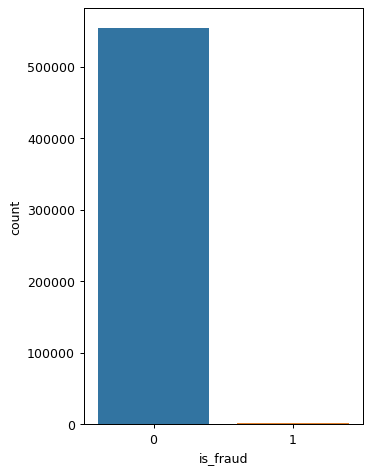

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (4,6), dpi = 90)
sns.countplot(x = credit_card_data['is_fraud']) # NORMAL TRANSACTION IS MORE THAN FRAUD

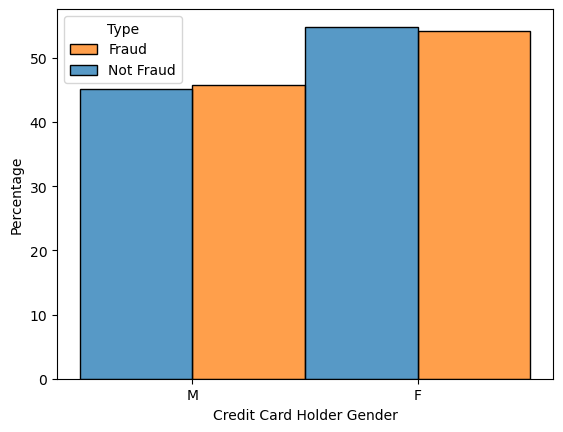

In [12]:
#Gender vs Fraud
ax=sns.histplot(x='gender',data=credit_card_data, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud']) #almost equally susceptible (50%) to transaction fraud. Gender is not very indicative of a fraudulent transaction.


Text(0.5, 1.0, 'The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

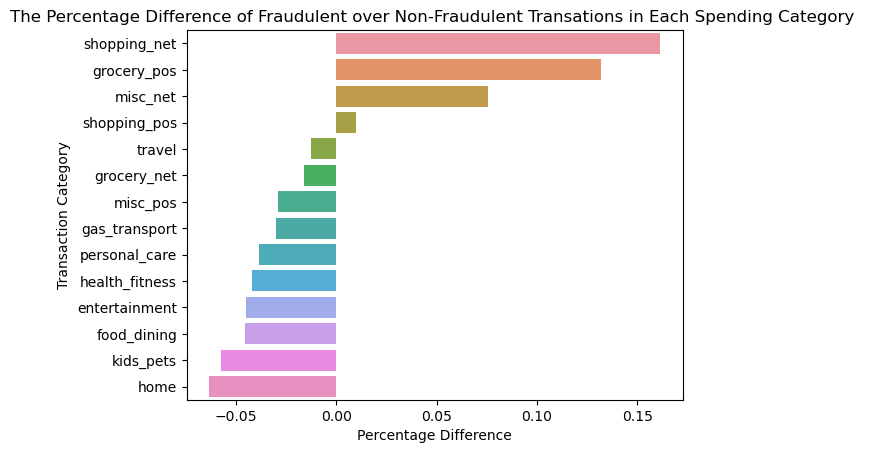

In [13]:
#calculate the percentage difference
a=credit_card_data[credit_card_data['is_fraud']==0]['category'].value_counts(normalize=True).to_frame().reset_index()
a.columns=['category','not fraud percentage']

b=credit_card_data[credit_card_data['is_fraud']==1]['category'].value_counts(normalize=True).to_frame().reset_index()
b.columns=['category','fraud percentage']
ab=a.merge(b,on='category')
ab['diff']=ab['fraud percentage']-ab['not fraud percentage']

ax=sns.barplot(y='category',x='diff',data=ab.sort_values('diff',ascending=False))
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')
#Fraud tends to happen more often in 'Shopping_net', 'Grocery_pos', and 'misc_net' 

# <font color=green>Under sampling---build a sample dataset containing similar distribution of normal and fraudulent transaction</font>

In [14]:
legit_sample=legit.sample(n= 2145)

# concatenating two data frame

In [15]:
new_dataset=pd.concat([legit_sample,fraud],axis=0)

In [16]:
new_dataset.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
250093,250093,2020-09-20 20:52:19,639023984367,fraud_Padberg-Sauer,home,69.67,Destiny,Lowe,F,79472 Stevens Trace Apt. 120,...,44.6087,-74.9732,69,Chief Executive Officer,1991-06-05,9ceef4c30b09de68f48f61764f1a515d,1379710339,44.905967,-75.641597,0
335190,335190,2020-10-27 14:40:15,3521417320836166,"fraud_Streich, Dietrich and Barton",shopping_net,1.93,Angela,Hodges,F,08236 Kim Hill,...,39.8490,-86.2720,910148,Firefighter,1975-11-30,ad9ba9bbe0f28b1ae5a1c91b42944157,1382884815,40.332592,-85.601658,0
462804,462804,2020-12-11 15:37:54,3538520143479972,fraud_Goyette-Gerhold,kids_pets,7.06,Cassandra,Nunez,F,9572 Austin Forge Suite 612,...,41.5686,-83.3632,269,Insurance underwriter,1965-09-15,81660498b51d8eb9b5b2f6dacaa06de6,1386776274,41.721580,-84.043009,0
399026,399026,2020-11-24 16:23:07,4809701904914,"fraud_Turner, Ziemann and Lehner",food_dining,24.20,Sabrina,Nolan,F,312 Eric Expressway Apt. 014,...,32.4204,-85.0796,59744,Chemical engineer,1984-02-07,0452df8166b98c4ef94b5bb1b9c4e1df,1385310187,32.852682,-84.449437,0
361470,361470,2020-11-08 19:33:02,4897067971111209737,fraud_Schmeler-Howe,personal_care,10.67,Randy,Wood,M,542 Howe Mission Apt. 092,...,28.3011,-82.6927,42619,Environmental education officer,1975-10-07,7d600762ffc20f2ddf61e47dcb27662d,1383939182,27.540105,-82.740452,0


In [17]:
new_dataset['is_fraud'].value_counts()

0    2145
1    2145
Name: is_fraud, dtype: int64

In [18]:
new_dataset.groupby('is_fraud').mean()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long
is_fraud,,,,,,,,,,
0,280725.577156,4.023195e+17,61.291720,47777.547786,38.459373,-89.413030,91241.371562,1.380755e+09,38.459083,-89.419229
1,242057.088112,3.854274e+17,528.356494,47862.900233,39.019971,-90.445556,64529.321678,1.379587e+09,39.018618,-90.465222


# Splitting  data into features and target

In [19]:
x=new_dataset.drop(columns='is_fraud',axis=1)
y=new_dataset['is_fraud']

In [20]:
# Encoding the categorical columns
from sklearn.preprocessing import OrdinalEncoder
cols = ['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
        'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']
encoder = OrdinalEncoder()
x[cols] = encoder.fit_transform(x[cols])

In [21]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

# split the data into training and testing data

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [23]:
print(x.shape,x_train.shape,x_test.shape)

(4290, 22) (3432, 22) (858, 22)


# Model Training
Logistic regression

In [24]:
model=LogisticRegression()

# Training the logistic regression model with training data

In [25]:
model.fit(x_train,y_train)

LogisticRegression()

# Model evaluation---accuracy score

In [26]:
#accuracy on training data
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [27]:
print('Accuracy on Training data:',training_data_accuracy)

Accuracy on Training data: 0.8426573426573427


In [28]:
#accuracy on test data
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)
print('Accuracy on Test data:',test_data_accuracy)

Accuracy on Test data: 0.8344988344988346
